# CASESTUDY - 7

In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


### Reading the dataset

In [2]:
data=pd.read_excel(r'C:\Users\Zephyr\Documents\ICT Assignments and Casestudies\Casestudy#7\iris.xls')

In [3]:
irisdat=data

In [4]:
irisdat.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
irisdat.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
irisdat.shape

(150, 5)

## Pre-Processing

In [7]:
irisdat.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

There are missing values present in the dataset. Lets handle them.

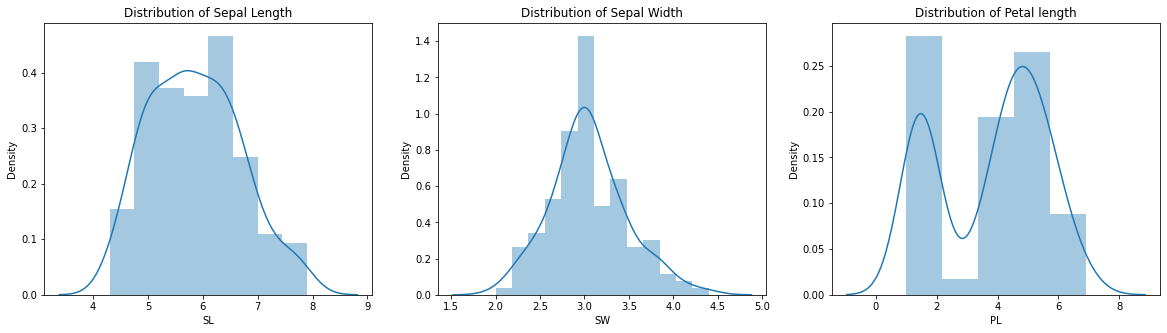

In [8]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.distplot(irisdat.SL)
plt.title('Distribution of Sepal Length')

plt.subplot(1,3,2)
sns.distplot(irisdat.SW)
plt.title('Distribution of Sepal Width')

plt.subplot(1,3,3)
sns.distplot(irisdat.PL)
plt.title('Distribution of Petal length')

plt.show()




Lets fill in the missing values with Mean for the Sepal length and Sepal Width columns and Mode for the 
Petal length column

In [9]:
#filling SL column with the mean
irisdat['SL']=irisdat['SL'].fillna(irisdat['SL'].mean())

#filling SW column with the mean
irisdat['SW']=irisdat['SW'].fillna(irisdat['SW'].mean())

#filling PL column with the median
irisdat['PL']=irisdat['PL'].fillna(irisdat['PL'].median())

In [10]:
# Checking again for missing values

irisdat.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

*There are no more missing values.

## Handling Outliers

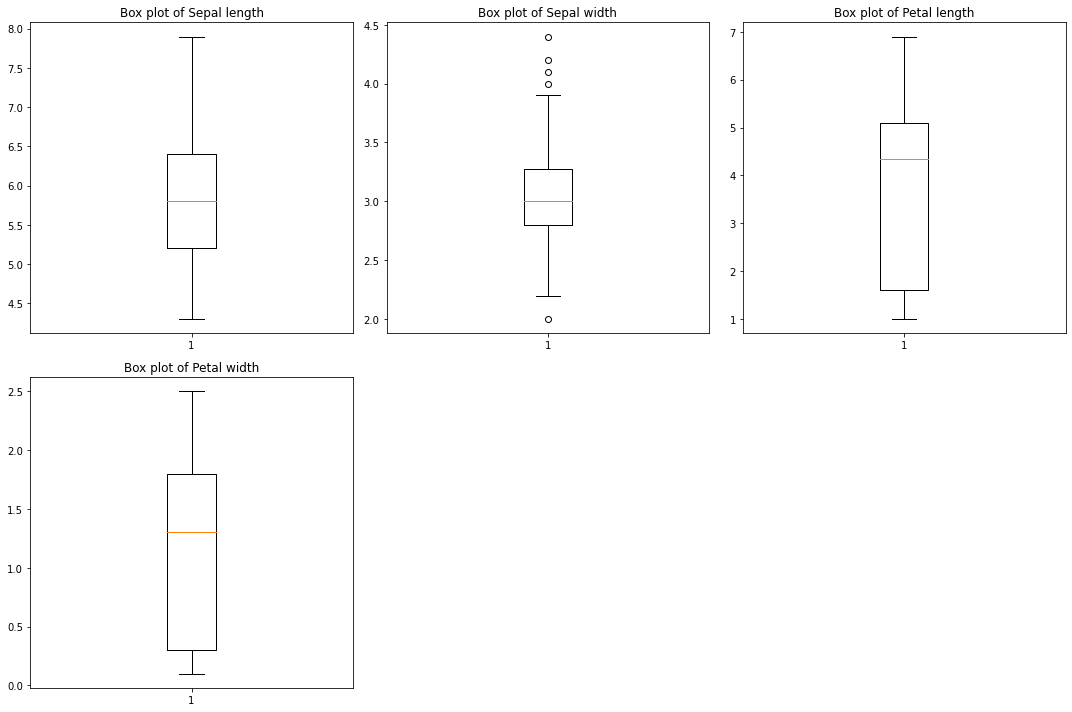

In [11]:
#boxplot 
plt.figure(figsize = (15,10))

#boxplot for SL column
plt.subplot(2,3,1)
plt.boxplot(irisdat['SL'])
plt.title('Box plot of Sepal length')

#boxplot for SW column
plt.subplot(2,3,2)
plt.boxplot(irisdat['SW'])
plt.title('Box plot of Sepal width')

#boxplot for PL column
plt.subplot(2,3,3)
plt.boxplot(irisdat['PL'])
plt.title('Box plot of Petal length')

#boxplot for PW column
plt.subplot(2,3,4)
plt.boxplot(irisdat['PW'])
plt.title('Box plot of Petal width')

plt.tight_layout()
plt.show()

* There are Outliers present in Sepal Width

In [12]:
#Handle outliers in Sepal width column
Q1 = np.percentile(irisdat['SW'], 25, interpolation='midpoint')
Q2 = np.percentile(irisdat['SW'], 50, interpolation='midpoint')
Q3 = np.percentile(irisdat['SW'], 75, interpolation='midpoint')

#find the interquartile range
IQR = Q3-Q1

#find upper limit and lower limit
low_limit = Q1-1.5*IQR
up_limit = Q3+1.5*IQR

print('Lower limit is :',low_limit)
print('Upper limit is :',up_limit)

Lower limit is : 2.1249999999999996
Upper limit is : 3.9250000000000003


In [13]:
#find the outliers
outlier=[]
for x in irisdat['SW']:
    if((x<low_limit) or (x>up_limit)):
        outlier.append(x)
        
print(outlier)

[4.0, 4.4, 4.1, 4.2, 2.0]


In [14]:
#The indexes of outliers

ind = (irisdat['SW']<low_limit)|(irisdat['SW']>up_limit)
data.loc[ind].index

Int64Index([14, 15, 32, 33, 60], dtype='int64')

In [15]:
irisdat['SW'] = np.where(irisdat['SW']<low_limit,low_limit,np.where(irisdat['SW']>up_limit,up_limit,irisdat['SW']))


In [16]:
irisdat.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.855944,3.043472,3.780000,1.198667
std,0.808480,0.402836,1.729424,0.763161
min,4.300000,2.125000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.275000,5.100000,1.800000
max,7.900000,3.925000,6.900000,2.500000


Text(0.5, 1.0, 'Box plot of Sepal width')

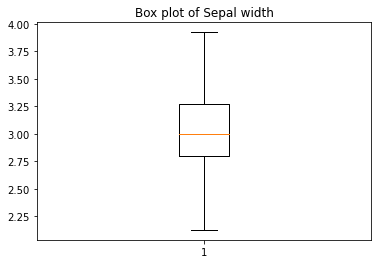

In [17]:
# checking the boxplot of Sw column again for outliers
plt.boxplot(irisdat['SW'])
plt.title('Box plot of Sepal width')

* The outliers have been succesfully dealt with.

## Label Encoding

In [18]:
#label encoding on Classification column
from sklearn.preprocessing import LabelEncoder
lencoder = LabelEncoder()
irisdat['Classification'] = lencoder.fit_transform(data['Classification'])

In [19]:
irisdat.describe()

,SL,SW,PL,PW,Classification
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.855944,3.043472,3.780000,1.198667,1.000000
std,0.808480,0.402836,1.729424,0.763161,0.819232
min,4.300000,2.125000,1.000000,0.100000,0.000000
25%,5.200000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.275000,5.100000,1.800000,2.000000
max,7.900000,3.925000,6.900000,2.500000,2.000000


In [20]:
# SPLITTING THE DATASET

y= irisdat['Classification']
x= irisdat.drop('Classification',axis=1)

In [21]:
x

,SL,SW,PL,PW
0,5.100000,3.5,1.40,0.2
1,4.900000,3.0,1.40,0.2
2,5.855944,3.2,1.30,0.2
3,4.600000,3.1,1.50,0.2
4,5.000000,3.6,1.40,0.2
...,...,...,...,...
145,6.700000,3.0,5.20,2.3
146,6.300000,2.5,5.00,1.9
147,6.500000,3.0,4.35,2.0
148,6.200000,3.4,5.40,2.3


In [22]:
#standard scaling
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaled=scaler.fit_transform(x)






In [23]:
x=pd.DataFrame(scaled,columns=x.columns)

In [24]:
x.head()

,SL,SW,PL,PW
0,-9.381508e-01,1.137081,-1.380791,-1.312977
1,-1.186357e+00,-0.108277,-1.380791,-1.312977
2,1.102258e-15,0.389866,-1.438808,-1.312977
3,-1.558667e+00,0.140795,-1.322775,-1.312977
4,-1.062254e+00,1.386153,-1.380791,-1.312977


##  Find out which classification model gives the best result to predict iris species (also do random forest algorithm)


In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=42)

### a)Logistic regression

In [26]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

y_pred=lr.predict(x_test)




In [27]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [28]:
#CHECKING THE PERFORMANCE

from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



*Accuracy is 97%

In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

*There is one misclassification

## b) KNN 

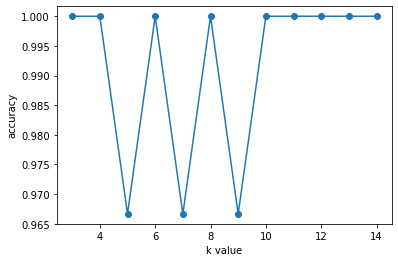

In [30]:
from sklearn.neighbors import KNeighborsClassifier
acc_scores = []
#using varied k values
neighbors = np.arange(3,15)
#creating a loop for each KNN values
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    acc_scores.append(acc)

#checking for which k value we got highest accuracy
plt.plot(neighbors,acc_scores,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.show()

*Accuracy is 1 (100%)

In [31]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

* There are no miscalculations

## c) SVM

### Linear SVM

In [32]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
#training the model
svm.fit(x_train, y_train)
#testing the model
y_pred = svm.predict(x_test)

In [33]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [34]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

*Accuracy is 97% and there is one miscalculation

### Polynomial SVM

In [35]:
svmp = SVC(kernel='poly', degree=3)
#training the model
svmp.fit(x_train,y_train)
#testing the model
y_pred= svmp.predict(x_test)

In [36]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      0.89      0.89         9
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [37]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]], dtype=int64)

* Accuracy is 0.93 (93%) and there is 1 miscalculation

### SVM with radial basis Function

In [38]:
svmr= SVC(kernel='rbf')
#training the model
svmr.fit(x_train, y_train)
#testing the model
y_pred = svmr.predict(x_test)

In [39]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [40]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

*Accuracy is 1 (100%) and there are no miscalculations

## d) Decision tree Classifier

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)

In [42]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [43]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

*Accuracy is 1 (100%) and there are no miscalculations

## e) Random Forrest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
 
rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)

In [45]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [46]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

*Accuracy is 1 (100%) and there are no miscalculations

# RESULT:-

KNN, SVM with Radial basis Function, Decision Tree classifier and Random Forest gave 100% accuracies with no miscalculations. 
